In [24]:
import des_queue
import simpy as sip
import numpy as np
from collections import deque
import pandas as pd
import os
import csv
from pathlib import Path
import matplotlib.pyplot as plt

In [25]:
# # name = 'servers_'
# mu, lamd = 1, 99/100
# # print(f"rho = {lamd/(1/mu)}")
# DES.run_simu(name, sip.Resource, mu, lamd, 1000)
# res_dict, cutoffs = DES.waiting_times('servers_normal_1000')

In [37]:
max_iter = 1000
n = 1
mu = 1
lamd = .8
a = np.random.exponential
b = np.random.exponential
queue_type = sip.Resource
f_name = 'testing_sign_11'

path = f"logged_data/{f_name}.csv"
print(f"Rho is {lamd/mu}.")

Rho is 0.8.


In [38]:
def gen_waiting_time(n,max_iter, mu, lamd , a, b, queue_type,f_name):
    des_queue.main_des(max_iter, n, lamd, (1/n)*mu , a, b, queue_type,f_name)
    my_df = pd.read_csv(f"logged_data/{f_name}.csv")
    n2_waiting_time = my_df["entry_time"] - my_df["start_request_time"]
    if(os.path.exists(path) and os.path.isfile(path)):
        os.remove(path)
    return n2_waiting_time
n= 1
res = gen_waiting_time(n,max_iter, mu, lamd , a, b, queue_type,f_name)
res

DES finished.


0        0.000000
1        0.117878
2        0.000000
3        0.372070
4        0.000000
          ...    
1009    10.133752
1010    10.580281
1011    10.398654
1012     9.235141
1013     9.359466
Length: 1014, dtype: float64

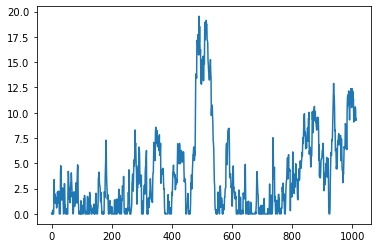

In [39]:
plt.plot(res)

In [29]:


# n 1 only for now
all_rhos = np.arange(0.1,1,0.1)
all_rhos

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

------

In [30]:
sign_df = pd.DataFrame(columns=["Comparison", "Rho", 'Low_idx_sign'])




# get csvs for n 1,2,4
alpha = 0.05
name = "test"
n_samples = 1000
# access one csv
for comparison in [1vs4,1vs2,2vs4]:
    for rho in all_rhos:
        # do simulation here

        while not is_significant(col1,col2):
            n_samples *= 2
            print(f"Ttest with all samples is not significant for rho {rho}, and comparing {comparison}. Doubling the sample to {n_samples}")

        else:
            low_idx =find_lowest_sign(col1,col2,alpha)
            write_signif(comparison,rho,low_idx, alpha, name)
            sign_df[] =



SyntaxError: invalid decimal literal (3134711916.py, line 11)

In [ ]:

def write_signif(comparison,rho,low_idx_sign, alpha,name):
    """Log the current data to the file with the experiment.
     If the file does not exist, make file and add header row.
     :return void
     """

    if not os.path.exists('signif_data'):
        os.makedirs("signif_data")

    # if file does not exist yet make one and write the column headers in it
    my_file = Path(os.path.join("signif_data", name+".csv"))

    if not my_file.is_file():
        with open(os.path.join("signif_data", name+".csv"),"w+") as f:
            wr = csv.writer(f)
            wr.writerow(["experiment_name","ID","Queue_length","start_request_time","entry_time","exit_time","current_time"])

    # log the data
    with open(os.path.join("signif_data", name+".csv"), "a") as f:

        wr = csv.writer(f)
        wr.writerow([comparison,rho,low_idx_sign, alpha])
    return None

In [ ]:
def find_lowest_sign(col1,col2,alpha):
    """
    Binary search for lowest significant index.
    :param col1:
    :param col2:
    :param alpha:
    :return: lowest index that is significant
    """
    n_samples = len(col1)
    high = n_samples
    low = 0
    last_signif_idx = n_samples
    while low <= high:

        mid = low + (high - low)//2


        if is_significant(array[mid], col1,col2,0.05) and last_signif_idx-1 == mid:
            return mid

        # if not significant yet move up left boundary
        elif not is_significant(array[mid],col1,col2,0.05):
            low = mid + 1
        # if is significant, move down right boundary
        else:
            last_signif_idx = mid
            high = mid - 1

    return -1

from scipy.stats import ttest_ind
def is_significant(idx,col1,col2,alpha):
   if ttest_ind(col1[:idx], col2[:idx])[1] < alpha:
       return True
   else:
       return False